<a href="https://colab.research.google.com/github/SandyaSuresh/RTLCompVisionWorkshop/blob/main/classification_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Pre-trained model

Upload images to classify:


Saving pexels-jack-bulmer-18703245.jpg to pexels-jack-bulmer-18703245.jpg


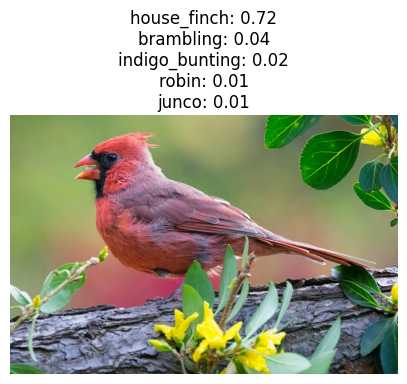

Done.


In [10]:
# ============================================================
# ONE-CELL: Upload images → Classify using pretrained CNN
# ============================================================

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# ---------------------------
# Load pretrained model
# ---------------------------
model = tf.keras.applications.EfficientNetV2B0(weights="imagenet")
IMG_SIZE = 224

# ---------------------------
# Preprocessing
# ---------------------------
def preprocess_image(img):
    img = img.resize((IMG_SIZE, IMG_SIZE))
    img = np.array(img)
    img = tf.keras.applications.efficientnet_v2.preprocess_input(img)
    return np.expand_dims(img, 0)

# ---------------------------
# Load labels
# ---------------------------
labels_path = tf.keras.utils.get_file(
    "imagenet_labels.txt",
    "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"
)
with open(labels_path, "r") as f:
    labels = [line.strip() for line in f.readlines()]


Upload images to classify:


Saving fried-eggs-plate-with-cutlery-on-wooden-board-2048x1152.jpg to fried-eggs-plate-with-cutlery-on-wooden-board-2048x1152 (1).jpg


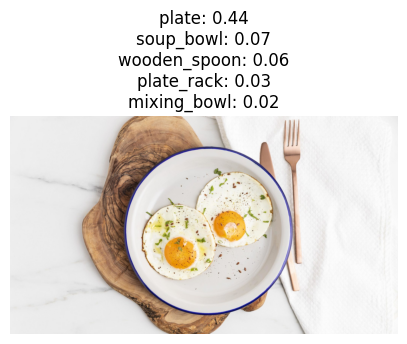

Done.


In [11]:
# ---------------------------
# Upload images
# ---------------------------
print("Upload images to classify:")
uploaded = files.upload()
image_paths = list(uploaded.keys())

# ---------------------------
# Classification
# ---------------------------
for path in image_paths:
    img = Image.open(path).convert("RGB")
    processed = preprocess_image(img)

    preds = model.predict(processed, verbose=0)
    top_5 = tf.keras.applications.imagenet_utils.decode_predictions(preds, top=5)[0]

    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis("off")
    title = "\n".join([f"{name}: {prob:.2f}" for (_, name, prob) in top_5])
    plt.title(title)
    plt.show()

print("Done.")